# Problems

In [1]:
import sys
# https://docs.python.org/3/library/sys.html - system-specific parameters and functions
import math
# https://docs.python.org/3/library/math.html - mathematical functions
import itertools
# https://docs.python.org/3/library/itertools.html - permutations and combinations
import random
# https://docs.python.org/3/library/random.html -generating random samples
import numpy as np
# https://numpy.org/doc/stable/ - numerical computing for series of values
import matplotlib
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/contents.html plotting 
import seaborn as sns
# https://seaborn.pydata.org/ -plotting
import pandas as pd
# https://pandas.pydata.org/pandas-docs/stable/index.html - data manipulation and analysis
import scipy
import scipy.stats as stats
# https://docs.scipy.org/doc/scipy/reference/stats.html - statistical functios

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html -
from collections import Counter
# https://docs.python.org/3/library/collections.html#collections.Counter - counting hashable objects
import voila
# https://voila.readthedocs.io/en/stable/ - turning Jupyter notebooks into standalone web applications
import ipywidgets as widgets
# https://ipywidgets.readthedocs.io/en/stable/ - interactive HTML widgets for

from ipywidgets import interact, interactive, HBox, VBox, HTML

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True



## Problem 1 - Combinations and Simulation

Tasks:
1.  Calculating the probability of randomly selecting exactly the 3 cups with milk added first.
2.  The simulation of the process 1,000 times to verify result.

The lady tasting tea is an experiment devised by British polymath Ronald Fisher in 1935. It was based on the claim of Fisher's acquaintance, Muriel Bristol, who stated she could tell whether milk or tea was poured first into a cup. Fisher's intention was not about tea, but about designing an experiment to test a claim fairly, minimizing the factor of randomness so that the claim could be proved or disproved on an objective basis.\
The null hypothesis of the experiment is that the taster has no remarkable ability and is simply guessing at random.
The alternative hypothesis is that the tester has the special ability she/he/they claims. The probability of guessing correctly at random is calculated and then compared to a statistical threshold (usually 5%). If the taster correctly recognised a number of cups that would be highly unlikely to be guessed at random ( usually with probability less than 5%), then the null hypothesis could be rejected.\
https://en.wikipedia.org/wiki/Lady_tasting_tea

##### Calculation of the probability of selecting 0, 1, 2, 3 cups from 10 randomly

First I need to count number of ways how to choose 3 cups from 10. Factorial number! is a number of ways how to arrange certain number of objects. Binomial coefficient formula gives us number of ways of selecting k objects from n objects without replacement and without order.

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

In [2]:
# Using math.factorial
total_cups=10
special_cups=3
ways = math.factorial(total_cups) / (math.factorial(special_cups) * math.factorial(total_cups - special_cups))
ways

120.0

In [3]:
cups_list = list(range(total_cups))
cups_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
# Or itertools.combinations
combs_cups = list(itertools.combinations(cups_list, special_cups))
len(combs_cups)

120

There are 120 ways of choose 3 cups from 10 cups.

Calculation of probability with hypergeometric formula

$$
P(\text{correct\_cups}) =
\frac{\binom{\text{special\_cups}}{\text{correct\_cups}} \cdot \binom{\text{total\_cups} - \text{special\_cups}}{\text{cups\_chosen} - \text{correct\_cups}}}
{\binom{\text{total\_cups}}{\text{cups\_chosen}}}
$$


https://www.youtube.com/watch?v=uzN7U88KSx8

In [5]:
prob_0 = (math.comb(3, 0) * math.comb(10 - 3, 3 - 0)) / math.comb(10, 3)
prob_0 * 100

29.166666666666668

29,16 % probability of choosing no cup right.

In [6]:
prob_1 = (math.comb(3, 1) * math.comb(10 - 3, 3 - 1)) / math.comb(10, 3)
prob_1 * 100

52.5

52.5 % probability of choosing 1 cup right.

In [7]:
prob_2 = (math.comb(3, 2) * math.comb(10 - 3, 3 - 2)) / math.comb(10, 3)
prob_2 * 100

17.5

17.5 % probability of choosing 2 cups right.

In [8]:
prob_3 = (math.comb(3, 3) * math.comb(10 - 3, 3 - 3)) / math.comb(10, 3)
prob_3 * 100

0.8333333333333334

0.83 % probability of choosing all 3 cups right.

##### Simulation

In [9]:
total_cups = 10
special_cups = 3
cups_chosen = 3
trials = 1000
cups_list = list(range(total_cups))

# Simulation
results = []
for _ in range(trials):
    # randomly choose the "special" cups
    special_set = set(random.sample(cups_list, special_cups))
    # randomly choose the guess
    guess_set = set(random.sample(cups_list, cups_chosen))
    # count overlap
    overlap = len(special_set & guess_set)
    results.append(overlap)


counts = Counter(results) # Count frequencies
counts_sorted = dict(sorted(counts.items()))# Sorting counts

simulated_probs = {k: counts[k] / trials for k in range(special_cups + 1)}
#Print results
print("counts:", counts_sorted)
print("simulated_probs:", simulated_probs)

counts: {0: 321, 1: 495, 2: 178, 3: 6}
simulated_probs: {0: 0.321, 1: 0.495, 2: 0.178, 3: 0.006}


After running this simulation 5 times, I got 5 different results in counts and probability. This is thanks to sampling error. As 3 cups with milk first and  3 cups guessed by the taster are chosen randomly, the probability fluctuates around 5 percent of the theoretical value.\
https://en.wikipedia.org/wiki/Sampling_error

The law of large number states that the average of the results obtained from a large number of independent random samples converges to the true value.
 
https://en.wikipedia.org/wiki/Law_of_large_numbers

I am going to increase number of trials to 1000000.

In [10]:
# Simulation 1000000 trials
results_million = []
for _ in range(1000000):
    # randomly choose the "special" cups
    special_set = set(random.sample(cups_list, special_cups))
    # randomly choose the guess
    guess_set = set(random.sample(cups_list, cups_chosen))
    # count overlap
    overlap = len(special_set & guess_set)
    results_million.append(overlap)


counts_million = Counter(results_million) # Count frequencies
counts_sorted_million = dict(sorted(counts_million.items()))# Sorting counts

simulated_probs_million = {k: counts_million[k] / 1000000 for k in range(special_cups + 1)}
#Print results
print("counts:", counts_sorted_million)
print("simulated_probs:", simulated_probs_million)

counts: {0: 291611, 1: 525402, 2: 174859, 3: 8128}
simulated_probs: {0: 0.291611, 1: 0.525402, 2: 0.174859, 3: 0.008128}


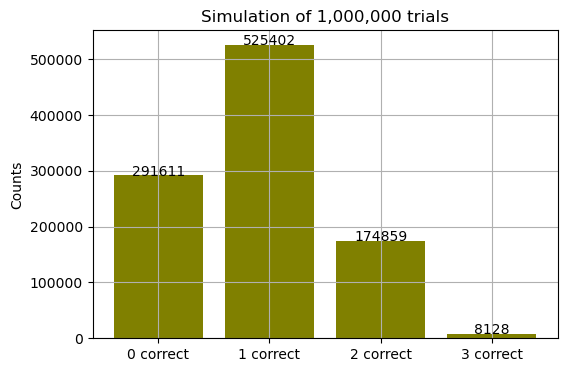

In [11]:
# Plot 
ks = list(counts_sorted_million.keys())
values = list(counts_sorted_million.values())
# Labels and title
plt.bar(ks, values, tick_label=[f"{k} correct" for k in ks], color='olive')
plt.ylabel("Counts")
plt.title(f"Simulation of 1,000,000 trials")

# labels above bars
for i, v in zip(ks, values):
    plt.text(i, v + 5, str(v), ha='center')

plt.show()

In [12]:
# %%
def nCk(n, k):
    return math.comb(n, k)

def hypergeom_pmf(k, N, K, n):
    """
    k = number of special cups guessed correctly
    N = total cups
    K = special cups
    n = cups chosen (guessed)
    """
    if k < 0 or k > K or k > n:
        return 0
    return nCk(K, k) * nCk(N - K, n - k) / nCk(N, n)

In [ ]:
# %%
def simulate_cups(total_cups=10, special_cups=3, cups_chosen=3, trials=5000):
    # Basic sanity corrections
    total_cups = max(1, total_cups)
    special_cups = max(1, min(special_cups, total_cups))
    cups_chosen = max(1, min(cups_chosen, total_cups))

    cups_list = list(range(total_cups))

    # Simulation
    results = []
    for _ in range(trials):
        special_set = set(random.sample(cups_list, special_cups))
        guess_set = set(random.sample(cups_list, cups_chosen))
        overlap = len(special_set & guess_set)
        results.append(overlap)

    counts = Counter(results)
    ks = np.arange(0, min(special_cups, cups_chosen) + 1)

    simulated_probs = np.array([counts.get(k, 0) / trials for k in ks])
    theoretical_probs = np.array([
        hypergeom_pmf(k, total_cups, special_cups, cups_chosen) for k in ks
    ])

    fig, ax = plt.subplots()
    width = 0.4
    ax.bar(ks - width/2, theoretical_probs, width=width, label="Theoretical")
    ax.bar(ks + width/2, simulated_probs, width=width, alpha=0.7, label="Simulated")

    ax.set_xlabel("Number of correct special cups")
    ax.set_ylabel("Probability")
    ax.set_title("Hypergeometric vs simulation")
    ax.legend()
    plt.show()

    print("k\tTheoretical\tSimulated")
    for k, t, s in zip(ks, theoretical_probs, simulated_probs):
        print(f"{k}\t{t:.4f}\t\t{s:.4f}")


total_cups_slider = widgets.IntSlider(
    description="Total cups",
    min=3, max=30, step=1, value=10
)
special_cups_slider = widgets.IntSlider(
    description="Special cups",
    min=1, max=30, step=1, value=3
)
cups_chosen_slider = widgets.IntSlider(
    description="Cups chosen",
    min=1, max=10, step=1, value=3
)
trials_slider = widgets.IntSlider(
    description="Trials",
    min=1, max=1000000, step=100, value=5_000
)

controls = {
    "total_cups": total_cups_slider,
    "special_cups": special_cups_slider,
    "cups_chosen": cups_chosen_slider,
    "trials": trials_slider,
}

ui = VBox([
    HTML("<h3>Hypergeometric: correct guesses</h3>"),
    HBox([total_cups_slider, special_cups_slider]),
    HBox([cups_chosen_slider, trials_slider]),
])

out = widgets.Output()

def update_problem1(**kwargs):
    with out:
        out.clear_output(wait=True)
        simulate_cups(**kwargs)

interactive_output_p1 = widgets.interactive_output(update_problem1, controls)

display(ui, out)


Output()

## Problem 2: Normal Distribution

Task:
1.  Evaluating whether numpy.random.standard_normal() generates values from a true normal distribution by generating a sample of 100,000 values. 
2.  Using scipy.stats.shapiro() to test whether the sample comes from a normal distribution.  
3. Creating a histogram of sample and overlaying the probability density function (PDF) of the standard normal distribution on the histogram.

A normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

The parameter μ is the mean or expectation of the distribution (and also its median and mode), while the parameter 
$σ^2$ is the variance. The standard deviation of the distribution is σ. A random variable with a Gaussian distribution is said to be normally distributed. 

https://en.wikipedia.org/wiki/Normal_distribution

##### Generating a sample of 100000 values
https://numpy.org/doc/2.2/reference/random/generated/numpy.random.standard_normal.html#numpy.random.standard_normal

In [14]:
# Generating the sample
data=np.random.standard_normal(100000)
data

array([-1.61459526, -0.1570416 , -0.34386251, ..., -0.65692043,
       -0.9060689 ,  0.71832454])

##### Shapiro-Wilk test

The Shapiro-Wilk test tests the null hypothesis that a data was drawn from a normal distribution. The W statistic is a measure of how close the data distribution is to a normal distribution. P-value measures the probability of observing the W value. If the p-value is greater than 0.05, it indicates that the data are probably normally distributed.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro

In [15]:
stats.shapiro(data)

c:\Users\Lucia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999819397926331, pvalue=0.9522344470024109)

In the documentation for the Shapiro-Wilk test, it is noted that with a number of samples over 5000, the W-statistic is accurate, but the p-value may not be. It is given by the limitation of the software in the calculation of the p-value over 5000. There is also a strong indication that with a W-statistic as extreme as 0.99, the data are probably from a normal distribution.\
https://github.com/scipy/scipy/blob/v1.16.1/scipy/stats/_morestats.py#L1943-L2030\
I am going to use the Kolmogorov-Smirnov test, which could work with large numbers of samples, to prove the normal distribution of data. This test (when just one sample is tested) compares the data's distribution to the theoretical distribution ( which could be normal, exponential, uniform, and so on). Then the D-statistic value is calculated. The range of the d-statistic is from 0 to 1. The closer the d-statistic value is to 0, the more similar the data's distribution is to the theoretical distribution. P-value is a calculation of the probability of reaching a d-statistic value. The statistic location is the point of maximal difference between the theoretical distribution and the data's distribution. The statistical sign shows the shift of data values to theoretical data values. 1 smaller values, -1 larger values than expected. The null hypothesis is that the sample's distribution is not significantly different from the theoretical distribution when the p-value > 0.05.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#kstest

In [16]:
stats.kstest(data, 'norm')

KstestResult(statistic=0.0020965560152093055, pvalue=0.7707894182949662, statistic_location=0.13111177310610866, statistic_sign=-1)

I can assume that the data are normally distributed.

##### Histogram and plot of normal probability density function

A histogram is a plot of the distribution of values.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy-stats-norm

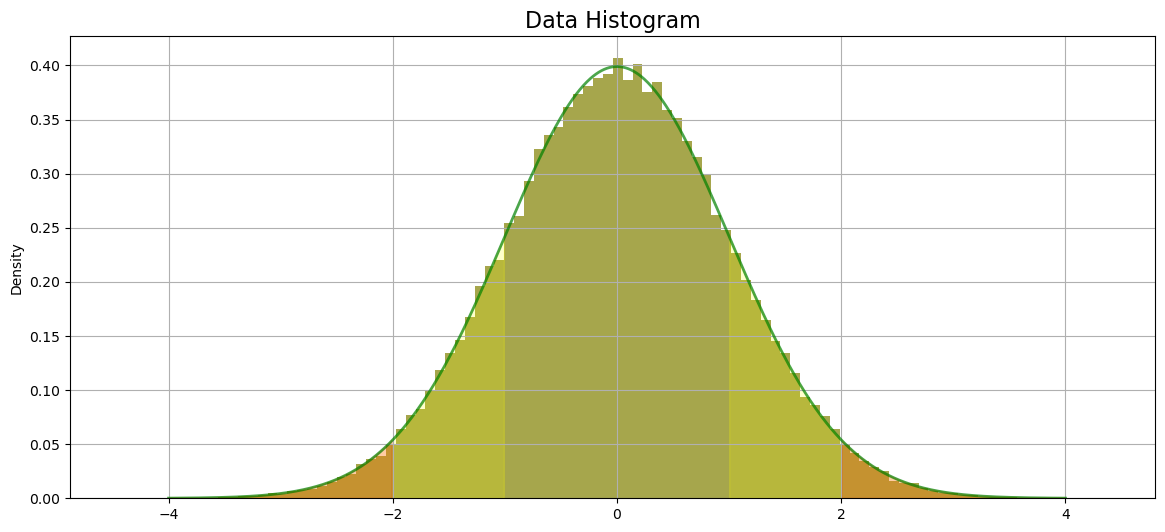

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

# Histogram
ax.hist(data, bins=100, color='olive', density=True, alpha=0.7)

# X values for the curve
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)

# Standard normal PDF
ax.plot(x, y, lw=2, color='green',  alpha=0.7)  

# 68-95-99.7 rule
ax.fill_between(x, y, where=(x < -1) | (x > 1), alpha=0.2, color='yellow')
ax.fill_between(x, y, where=(x < -2) | (x > 2), alpha=0.2, color='red')

# Labels
ax.set_title("Data Histogram", fontsize=16)
ax.set_ylabel("Density")
plt.show()

The histogram shows a typical curve of data that is normally distributed - bell-shaped and symmetrical around the mean. About 68% of the data fall within 1 standard deviation of the mean, about 95% of the data fall within 2 standard deviations of the mean, and about 99.7% of the data fall within 3 standard deviations of the mean.

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule#:~:text=In%20statistics%2C%20the%2068%E2%80%9395,sigma

## Problem 3: T-Tests

Tasks:
1. Comparing the resting heart rates of smokers and non-smokers from sets containing resting heart rates for a sample of patients, along with whether they smoke or not. Calculating the t-statistic based on the data set, using Python without scipy or statsmodels. 
2. Comparing it to the value given by scipy.stats. 

##### What is a t-test?

A t-test is a statistical test that compares means to see if the difference is likely due to chance or reflects a real effect in the population. It can be done as a one-sample t-test (when the mean of the sample is compared with the hypothesized mean) or as a two-sample t-test with related samples (paired t-test) or unrelated samples (independent t-test). The t-statistic measures how far the sample result (the difference in means) is from what the null hypothesis expects, in units of standard error (SE).​\
When equal variances are assumed (pooled t-test)

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$

$$ SE = s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} $$

where  

$$ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $$

$ n_1, n_2 $ are sample sizes\
$ s_p $ is the pooled standard deviation\
$ s_1^2, s_2^2 $ are sample variances\
$ \bar{X}_1, \bar{X}_2 $ are sample means

The null hypothesis of the t-test is that there is no significant difference in the means of two groups, while p-value > 0.05, so a difference between the means could be given by random chance.

#### Data
Patient ID	Smokes	Resting Heart Rate\
0&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;81\
1&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;68\
2&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;69\
3&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;76\
4&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;74\
5&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;77\
6&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;79\
7&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;75\
8&emsp;&emsp;&emsp;&emsp;Yes&emsp;&emsp;&emsp;&emsp;61\
9&emsp;&emsp;&emsp;&emsp;No&emsp;&emsp;&emsp;&emsp;68\
10&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;74\
11&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;72\
12&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;73\
13&emsp;&emsp;&emsp;&ensp;Yes&emsp;&emsp;&emsp;&emsp;70\
14&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;67\
15&emsp;&emsp;&emsp;&ensp;No&emsp;&emsp;&emsp;&emsp;67

As data to compare are unpaired samples, I chose independent t-test. 

In [18]:
# Arrays 
smokers = [81, 69, 76, 77, 79, 61, 74, 73, 70]
nonsmokers = [68, 74, 75, 68, 72, 67, 67]

#### Assumptions
There are 6 assumptions that the independent t-test should meet:\
https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php
1. The dependent variable should be measured on a continuous scale - O.K. in our case.
2. The independent variable should consist of two categorical, independent groups - O.K. in our case.
3. Independence of observations, which means that there is no relationship between the observations in each group or between the groups themselves - O.K. in our case.
4. There should be no significant outliers - It will be checked.
5. The dependent variable should be approximately normally distributed for each group of the independent variable - It will be checked.
6. Homogeneity of variances - It will be checked

##### Interquartile range method to find outliers
In this method, median, first interquartile (Q1), and third interquartile (Q3) values have to be identified. Q3 - Q1 is giving the interquartile range (IQR). Then, lower and upper fence values can be calculated as: 

Upper fence = Q3 + (1.5 * IQR)

Lower fence = Q1 - (1.5 * IQR)


The significant outliers are any values greater than the upper fence value or less than the lower fence value.

https://en.wikipedia.org/wiki/Interquartile_range

In [19]:
# sorting helps to identify median, Q1, Q3 values
smokers_sorted = sorted(smokers)
nonsmokers_sorted = sorted(nonsmokers)

print("Smokers sorted:", smokers_sorted)
print("Non-smokers sorted:", nonsmokers_sorted)

Smokers sorted: [61, 69, 70, 73, 74, 76, 77, 79, 81]
Non-smokers sorted: [67, 67, 68, 68, 72, 74, 75]


In [20]:
smokers_M = 74                        
smokers_Q1 = 70                                                  
smokers_Q3 = 77
smokers_IQR = smokers_Q3 - smokers_Q1 

low_fence_smokers= smokers_Q1 - (1.5 * smokers_IQR)
high_fence_smokers = smokers_Q3 + (1.5 * smokers_IQR)

print("Low fence for smokers: ",low_fence_smokers)
print("High fence for smokers: ",high_fence_smokers)
print("Smokers data: ", smokers_sorted)

Low fence for smokers:  59.5
High fence for smokers:  87.5
Smokers data:  [61, 69, 70, 73, 74, 76, 77, 79, 81]


No significant outliers for smokers array can be found.

In [21]:
nonsmokers_M = 68                        
nonsmokers_Q1 = 67.5                                                  
nonsmokers_Q3 = 73
nonsmokers_IQR = nonsmokers_Q3 - nonsmokers_Q1 

low_fence_nonsmokers= nonsmokers_Q1 - (1.5 * nonsmokers_IQR)
high_fence_nonsmokers = nonsmokers_Q3 + (1.5 * nonsmokers_IQR)

print("Low fence for nonsmokers: ",low_fence_nonsmokers)
print("High fence for smokers: ",high_fence_nonsmokers)
print("Smokers data: ", nonsmokers_sorted)

Low fence for nonsmokers:  59.25
High fence for smokers:  81.25
Smokers data:  [67, 67, 68, 68, 72, 74, 75]


No significant outlier for nonsmoker array can be found.

##### Normal distribution check
I decided to check the normal distribution of values with the Shapiro-Wilk test, as this method works well for small datasets. 
The minimum number of samples for Shapiro-Wilk test is 3.

In [22]:
stats.shapiro(smokers)

ShapiroResult(statistic=0.9473088979721069, pvalue=0.6605566143989563)

In [23]:
stats.shapiro(nonsmokers)

ShapiroResult(statistic=0.8303568959236145, pvalue=0.08064436167478561)

I can assume that data in both arrays are normally distributed as p-value in both test is not higher than 0.05.

##### Homogeneity of variances

Variance measures how the values of the set are spread around the mean.
 
A small variance → data points are close to the mean.\
A large variance → data points are more spread out.

A very easy way to compare the variances of datasets is using a box plot. If the lengths of whiskers differ greatly, the data in the datasets are not spread similarly.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: >

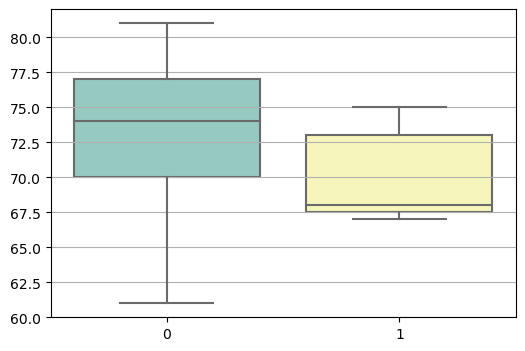

In [24]:
sns.boxplot(data=(smokers, nonsmokers), palette="Set3")

Variance formula:
$$
s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$$
where $ x_1 $ is 1 value in group(array,set).


In [25]:
# Calculate variance of smokers array
mean_smokers = sum(smokers) / len(smokers)
variance_smokers = sum((x - mean_smokers) ** 2 for x in smokers) / (len(smokers) - 1) # x is each value in array
print("Variance of smokers:", variance_smokers)

# Calculate variance of nonsmokers array
mean_nonsmokers = sum(nonsmokers) / len(nonsmokers)
variance_nonsmokers = sum((x - mean_nonsmokers) ** 2 for x in nonsmokers) / (len(nonsmokers) - 1) # x is each value in array
print("Variance of nonsmokers:", variance_nonsmokers)

Variance of smokers: 36.75
Variance of nonsmokers: 11.809523809523808


These two arrays do not have equal variances. 

##### Calculating t-statistic without stats.scipy
As variances of samples are not equal, I have to use a bit Welch's method of calculating t-statistic
$$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\tfrac{s_1^2}{n_1} + \tfrac{s_2^2}{n_2}}} $$

or 

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{SE} $$

https://en.wikipedia.org/wiki/Welch%27s_t-test

In [26]:
n1 = len(smokers)
n2 = len(nonsmokers)
se = ((variance_smokers / n1) + (variance_nonsmokers / n2)) ** 0.5

# Calculating t-statistic without stats.scipy
t_value = (mean_smokers - mean_nonsmokers) / se
print("Calculated t-value (Welch's t-test): ", t_value)
print("Means of smokers' group:", mean_smokers)
print("Means of non-smokers' group:", mean_nonsmokers)


Calculated t-value (Welch's t-test):  1.328165641371784
Means of smokers' group: 73.33333333333333
Means of non-smokers' group: 70.14285714285714


In [27]:
# Welch's t-Test
stats.ttest_ind(smokers, nonsmokers, equal_var = False)

Ttest_indResult(statistic=1.328165641371784, pvalue=0.20694631459381652)

I can assume that, even though there is a difference in means between the smokers' and nonsmokers' groups, this difference is not significant. 

## Problem 4: Type I Error
Tasks: 
1. Generating three samples with 100 values each with numpy.random.standard_normal()
2. Performing one-way ANOVA on the three samples and counting whenever a Type I error occurs.

##### Type I error
A Type I error happens when the null hypothesis is rejected even though it is actually true.
For example, an alternative cure is tested. By chance, in a small number of trials, it may appear effective, even though in reality it has no true effect. If the significance level is at 5% (𝛼 = 0.05), this means that in about 5% of studies, it might falsely conclude the cure works when it does not. This is called a false positive error.\
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

##### ANOVA
ANOVA is a statistical test, with at least 2 groups, when groups' means are compared. ANOVA test checks the ratio:

$$ F = \frac {Between-group variance}{Within-group variance} $$

If this ratio is much larger than 1, it suggests that the group means are not all equal. The null hypothesis of ANOVA is: All groups' means are equal. The alternative hypothesis: At least 1 mean is different. P-value is the probability of obtaining such a t-statistic value. If $p \leq 0.05$ the alternative hypothesis could be assumed as right.\
https://en.wikipedia.org/wiki/Analysis_of_variance

##### Simulation

In [28]:

no_type_i = 0
alpha = 0.05
n_sim = 10000

for _ in range(n_sim):
    # Generating 3 samples
    sample_a = np.random.standard_normal(100)
    sample_b= np.random.standard_normal(100)
    sample_c= np.random.standard_normal(100)
    
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample_a, sample_b, sample_c)
    
    # Counting type I errors
    if p_value < alpha:
        no_type_i += 1

# Probability
prob_type_i = no_type_i / n_sim
print(f"Type I Error Rate: {prob_type_i:}")

Type I Error Rate: 0.0448


This simulation is continuously giving a type I error estimated probability of around 0.05. What if I change the number of trials to 100?

In [29]:
# restart and run dependencies at the beginning of the notbook first
no_type_i = 0
alpha = 0.05
n_sim = 100

for _ in range(n_sim):
    # Generating 3 samples
    sample_a = np.random.standard_normal(100)
    sample_b= np.random.standard_normal(100)
    sample_c= np.random.standard_normal(100)
    
    # one-way ANOVA
    f_stat, p_value = stats.f_oneway(sample_a, sample_b, sample_c)
    
    # Counting type I errors
    if p_value < alpha:
        no_type_i += 1

# Probability
prob_type_i = no_type_i / n_sim
print(f"Type I Error Rate: {prob_type_i:}")

Type I Error Rate: 0.04


The Type I error rate fluctuates more. This is thanks to the Law of large numbers that I mentioned above when I explained the first problem - Combinations and Simulation. This difference can be counted as Monte Carlo standard error 

MCSE = np.sqrt(alpha * (1 - alpha) / number of trials)

https://en.wikipedia.org/wiki/Monte_Carlo_method

In [30]:

mcse100 = np.sqrt(alpha * (1 - alpha) / 100)
print(f"Approx MC SE: {mcse100:} )")

Approx MC SE: 0.021794494717703367 )


In [31]:
mcse10000 = np.sqrt(alpha * (1 - alpha) / 10000)
print(f"Approx MC SE: {mcse10000:} )")

Approx MC SE: 0.0021794494717703367 )


## Problem 5: Binomial distribution

##### What is the binomial distribution?

"The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes-no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p)."

 https://en.wikipedia.org/wiki/Binomial_distribution

The term "discrete" describes situations where a random variable can take on specific, separate values (not any value in between).  In comparison with the normal distribution (which is theoretically infinite), the binomial distribution is finite. Examples of experiments where data are distributed binomially could be coin flips or guessing the right answers in a test randomly.

The probability mass function (PMF) of the binomial distribution:

$$
f(k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k = 0, 1, 2, \dots, n
$$

where

n = Total number of trials\
k = Number of successes\
p = Probability of success in the range 0 ≤ p ≤ 1


For generating samples from a binomial distribution, I am going to use numpy.random.binomial().
https://numpy.org/doc/2.0/reference/random/generated/numpy.random.binomial.html#numpy-random-binomial

In [32]:
# Simulation: a person guesses 100 yes/no questions
guess_test1 = np.random.binomial(n=1, p=0.5, size=100)
print(guess_test1)

[0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1]


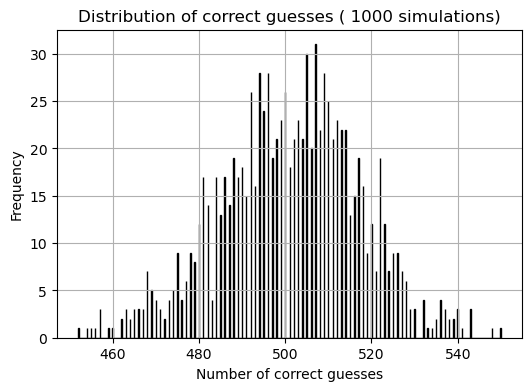

In [33]:
# Now simulation of 1000 people guessing 1000 yes/no questions
n_questions = 1000   # number of yes/no questions
p = 0.5             # probability of correct guess
n_trials = 1000  # simulate 1000 times
# Generating data
scores = np.random.binomial(n_questions, p, size=n_trials)

# plot histogram
plt.hist(scores, bins=1000, edgecolor='black', color='blue')
plt.xlabel('Number of correct guesses')
plt.ylabel('Frequency')
plt.title('Distribution of correct guesses ( 1000 simulations)')
plt.show()


This plot resembles the plot of a normal distribution. I am going to check this with the Shapiro-Wilk test.

In [34]:
normal_bool=stats.shapiro(scores)
normal_bool

ShapiroResult(statistic=0.9972940683364868, pvalue=0.09280858933925629)

The Shapiro-Wilk test gave me proof of normally distributed data, even though I cannot assume that this data is normally distributed. "In probability theory, the central limit theorem (CLT) states that, under appropriate conditions, the distribution of a normalized version of the sample mean converges to a standard normal distribution."
https://en.wikipedia.org/wiki/Central_limit_theorem\
In the case of the binomial distribution, these conditions are p-value = 0.5 and number of samples n(1−p) ≥ 5.

In [35]:
# Simulation of 50 people guessing 20 questions, each with 4 options, only 1 is correct
questions4 = 20   # number of questions
p4 = 0.25             # 1 from 4 answers is correct
trials4 = 50 # simulate 50 times
# Generating data
scores4 = np.random.binomial(questions4, p4, trials4)

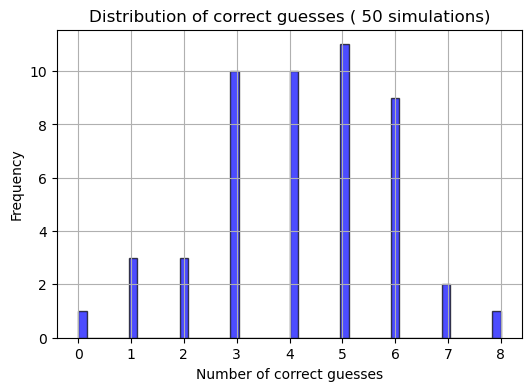

In [36]:
# plot histogram
plt.hist(scores4, bins=50, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('Number of correct guesses')
plt.ylabel('Frequency')
plt.title('Distribution of correct guesses ( 50 simulations)')
plt.show()

In [37]:
normal_bool4=stats.shapiro(scores4)
normal_bool4

ShapiroResult(statistic=0.963204026222229, pvalue=0.12109135091304779)

Based on the Shapiro-Wilk test values of statistic and p, I can assume that this data does not come from the normal distribution.

***
## End